In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

Shape of waveform:torch.Size([2, 93312])
Sample rate:44100
<class 'int'>


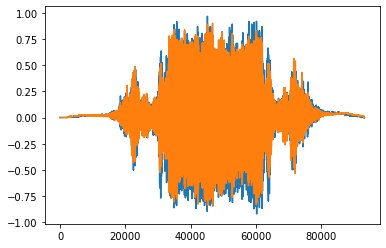

In [2]:
filename='/home/akashnagaraj/Desktop/DEEP-LEARNING/Torch/supreme-torch/data/song.mp3'
waveform,sample_rate=torchaudio.load(filename)

print('Shape of waveform:{}'.format(waveform.size()))
print('Sample rate:{}'.format(sample_rate))
print(type(sample_rate))
plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectogram:torch.Size([2, 201, 467])


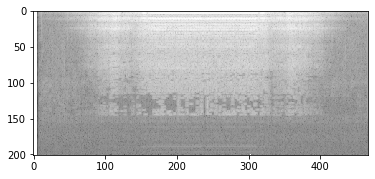

In [3]:
specgram=torchaudio.transforms.Spectrogram()(waveform)

print('Shape of spectogram:{}'.format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(),cmap='gray')

Shape of transformed waveform:torch.Size([1, 9332])


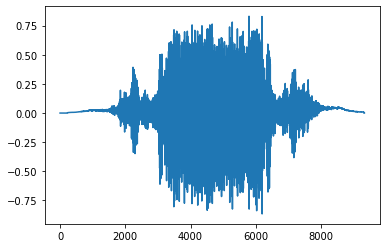

In [4]:
new_sample_rate=sample_rate/10

channel=0
transformed=torchaudio.transforms.Resample(sample_rate,new_sample_rate)(waveform[channel,:].view(1,-1))

print('Shape of transformed waveform:{}'.format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

In [5]:
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(),waveform.max(),waveform.mean()))

Min of waveform: -0.9218668341636658
Max of waveform: 0.9690249562263489
Mean of waveform: 0.012823089025914669


In [6]:
def normalize(tensor):
    tensor_minusmean=tensor-tensor.mean()
    return tensor_minusmean/tensor.abs().max()

Shape of transformed waveform: torch.Size([2, 93312])


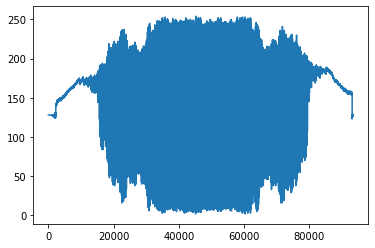

In [7]:
transformed=torchaudio.transforms.MuLawEncoding()(waveform)
print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of reconstructed waveform:torch.Size([2, 93312])


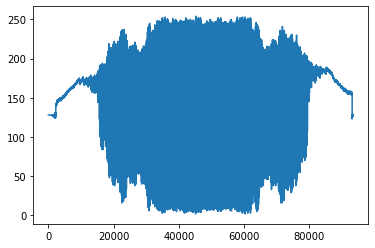

In [8]:
reconstructed=torchaudio.transforms.MuLawDecoding()(waveform)

print("Shape of reconstructed waveform:{}".format(reconstructed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

In [9]:
err=((waveform-reconstructed).abs()/waveform.abs()).median()

print("Median relative difference between original and MuLaw reconstructed signagls: {}%".format(err))

Median relative difference between original and MuLaw reconstructed signagls: 22.969667434692383%
